In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
list20 = ['총구매금액_M_증감', '편의품_비중', '선매품_M_증감', '선매품_비중', 'A사_비중', '앵겔지수',
       'B사_비중', '소비재기타_비중', 'A사총매출_M_증감', '선매품_F_증감', 'C사_비중',
       '총구매금액_M_변동', '점포코드', '편의품_M_증감', '패션의류/잡화_M_증감', '전문품_비중',
       '총방문빈도_F_증감', '식료품_M_증감', '구매시간', '거주지역','성별','연령대','pred_label']# target

In [12]:
df = pd.read_csv('./test_df.csv',index_col=0)
test_df = df[list20]

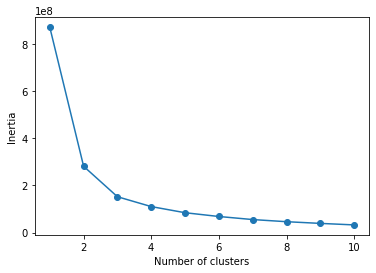

In [13]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(test_df)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

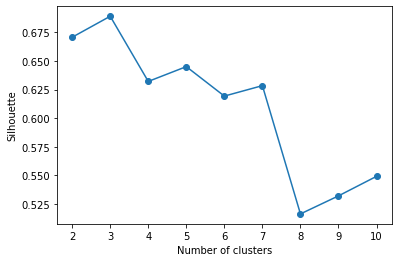

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import numpy as np
import matplotlib.pyplot as plt

silhouette_vals = []
for i in range(2, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    pred = kmeans_plus.fit_predict(test_df)
    silhouette_vals.append(np.mean(silhouette_samples(test_df, pred, metric='euclidean')))

plt.plot(range(2, 11), silhouette_vals, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [15]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [16]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

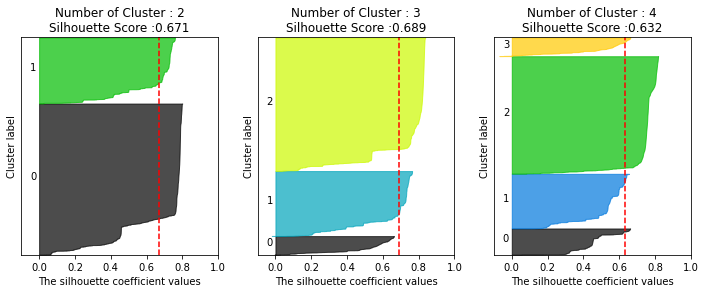

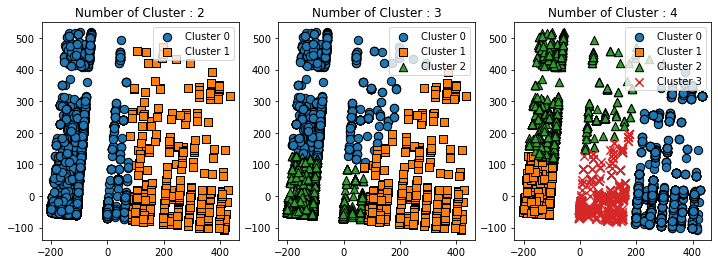

In [17]:
visualize_silhouette([2,3,4],test_df)
visualize_kmeans_plot_multi([2,3,4],test_df)

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(test_df)
test_df['cluster_label'] = labels

In [72]:
test_df.groupby('cluster_label').describe().pred_label

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.164534,0.370872,0.0,0.0,0.0,0.0,1.0
1,5729.0,0.186595,0.389620,0.0,0.0,0.0,0.0,1.0
2,11777.0,0.194617,0.395922,0.0,0.0,0.0,0.0,1.0


In [73]:
test_df.groupby('cluster_label').describe().성별

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.805606,0.395854,0.0,1.0,1.0,1.0,1.0
1,5729.0,0.800663,0.399537,0.0,1.0,1.0,1.0,1.0
2,11777.0,0.834253,0.371869,0.0,1.0,1.0,1.0,1.0


In [74]:
test_df.groupby('cluster_label').describe().연령대

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,3.964656,0.923920,1.0,3.0,4.0,5.0,6.0
1,5729.0,3.940478,0.925159,1.0,3.0,4.0,5.0,6.0
2,11777.0,4.135773,0.990782,1.0,3.0,4.0,5.0,6.0


In [75]:
test_df.groupby('cluster_label').describe().편의품_비중

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.828434,0.213538,0.01766,0.77081,0.91262,0.97683,1.0
1,5729.0,0.510940,0.331815,0.00180,0.15917,0.56452,0.81862,1.0
2,11777.0,0.502393,0.313713,0.00000,0.19043,0.51781,0.79345,1.0


In [76]:
test_df.groupby('cluster_label').describe().앵겔지수

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.733445,0.193485,0.01858,0.66292,0.79641,0.86390,0.99736
1,5729.0,0.425801,0.275362,0.00229,0.15679,0.43111,0.66779,0.98327
2,11777.0,0.426174,0.262408,0.00000,0.18318,0.42296,0.64898,1.00000


In [77]:
test_df.groupby('cluster_label').describe().선매품_M_증감

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.071298,1.679260,-7.0,-1.0,0.0,1.0,8.0
1,5729.0,0.037877,1.526122,-8.0,-1.0,0.0,1.0,8.0
2,11777.0,-0.028021,1.512256,-8.0,-1.0,0.0,1.0,9.0


In [78]:
test_df.groupby('cluster_label').describe().선매품_비중

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.153178,0.208043,0.0,0.02514,0.07678,0.19501,2.92088
1,5729.0,0.415475,0.315684,0.0,0.14484,0.34565,0.66369,3.03223
2,11777.0,0.433064,0.336960,0.0,0.15967,0.38507,0.66850,9.75081


In [79]:
test_df.groupby('cluster_label').describe().A사_비중

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.169196,0.244211,0.0,0.01103,0.06140,0.20815,0.99083
1,5729.0,0.483033,0.416156,0.0,0.06526,0.33696,0.95959,1.00000
2,11777.0,0.526775,0.418431,0.0,0.07092,0.56371,0.97050,1.00000


In [80]:
test_df.groupby('cluster_label').describe().B사_비중

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.072048,0.116670,0.0,0.00442,0.02423,0.08883,0.90431
1,5729.0,0.334075,0.387438,0.0,0.01358,0.08698,0.77900,1.00000
2,11777.0,0.373909,0.406697,0.0,0.01050,0.11125,0.84980,1.00000


In [81]:
test_df.groupby('cluster_label').describe().C사_비중

,count,mean,std,min,25%,50%,75%,max
cluster_label,,,,,,,,
0,1641.0,0.756247,0.256623,0.00769,0.65560,0.85428,0.94711,1.0
1,5729.0,0.181254,0.331628,0.00000,0.00032,0.00373,0.07886,1.0
2,11777.0,0.090625,0.243308,0.00000,0.00024,0.00262,0.01978,1.0
